In [1]:
import torch 
import matplotlib.pyplot as plt
from torch import nn

In [2]:
dev = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
class Generator(nn.Module):

    def __init__(self, z_dim, img_dim):
        super(Generator,self).__init__()

        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256,img_dim),
            nn.Tanh()
        )

    def forward(self,x):
        return self.gen(x)

gen = Generator(z_dim = 64, img_dim = 784).to(dev)
print(gen)

Generator(
  (gen): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Tanh()
  )
)


In [8]:
def plot_samples(msg, model_path, model):

    rows = 10
    cols = 8
    fig,ax = plt.subplots(nrows = rows, ncols = cols, figsize = (18,22))
    fig.patch.set_facecolor('black')
    ax = ax.flatten()

    model.load_state_dict(torch.load(model_path, map_location=dev))

    noise = torch.randn((rows*cols,64))
    yhat = model.forward(noise)
    fig.suptitle(msg, size = 80, color='w')

    for i in range(len(ax)):
        to_plot = yhat[i].view(28,28).detach()
        ax[i].imshow(to_plot)
        ax[i].axis(False)

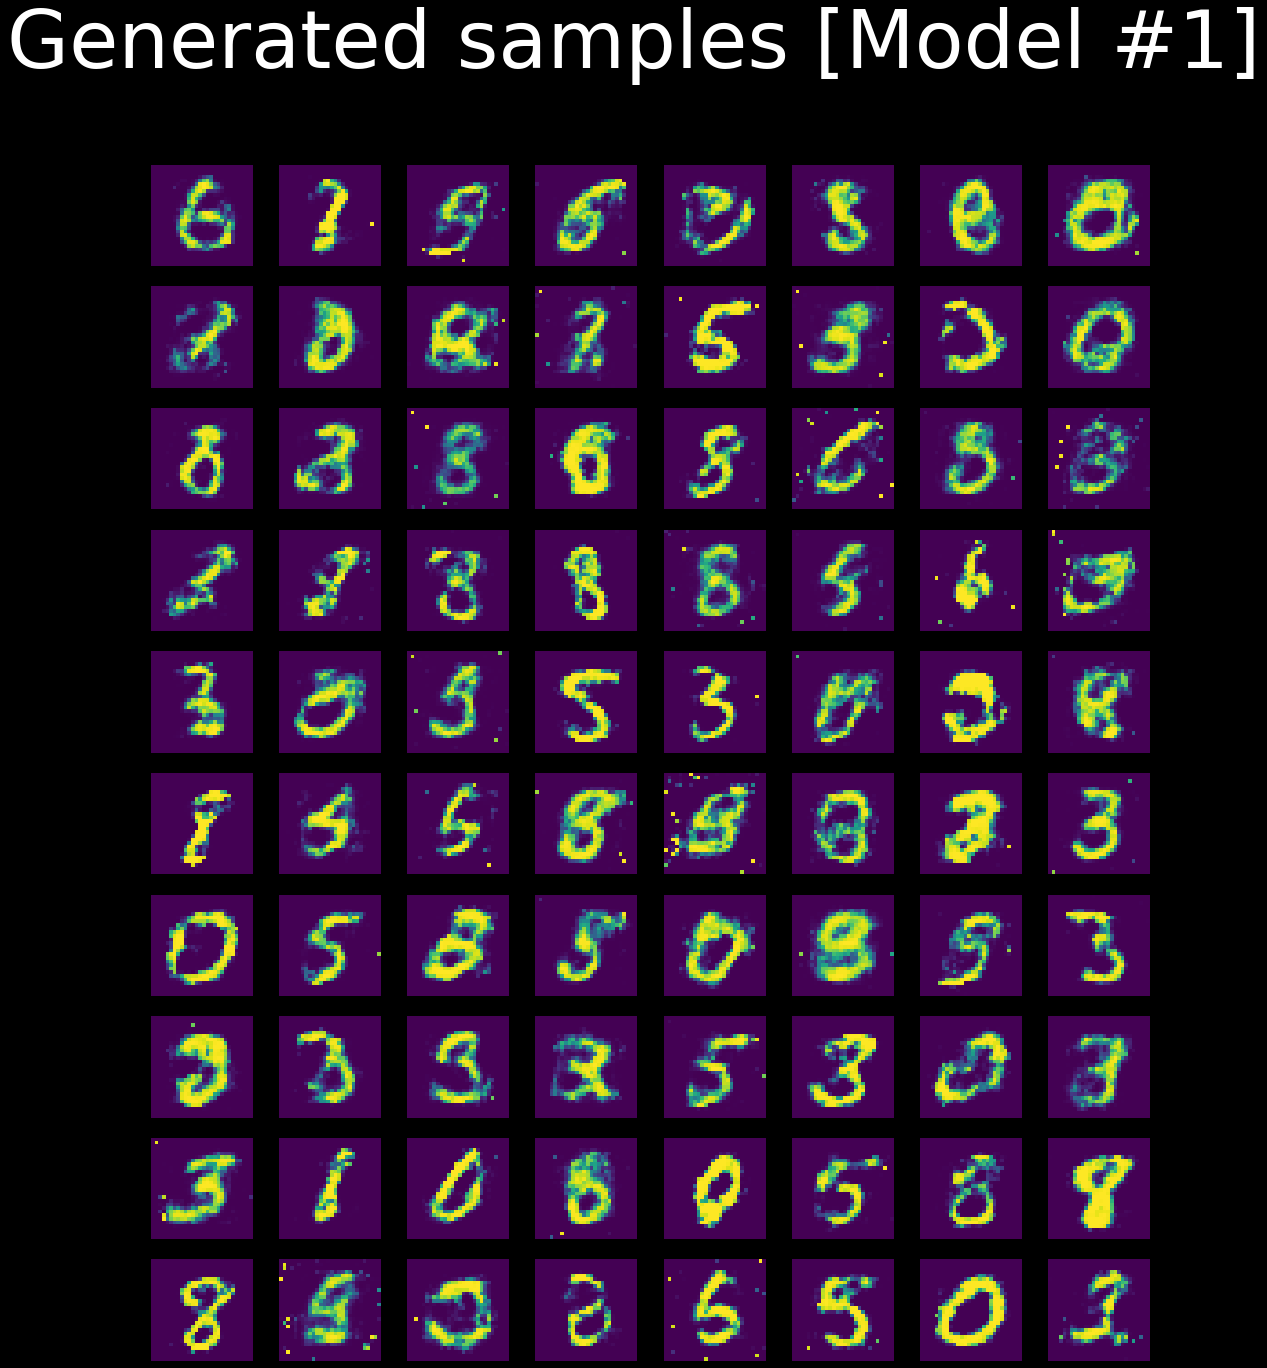

In [9]:
plot_samples('Generated samples [Model #1]', 'GAN_models/gen500.pt', gen)

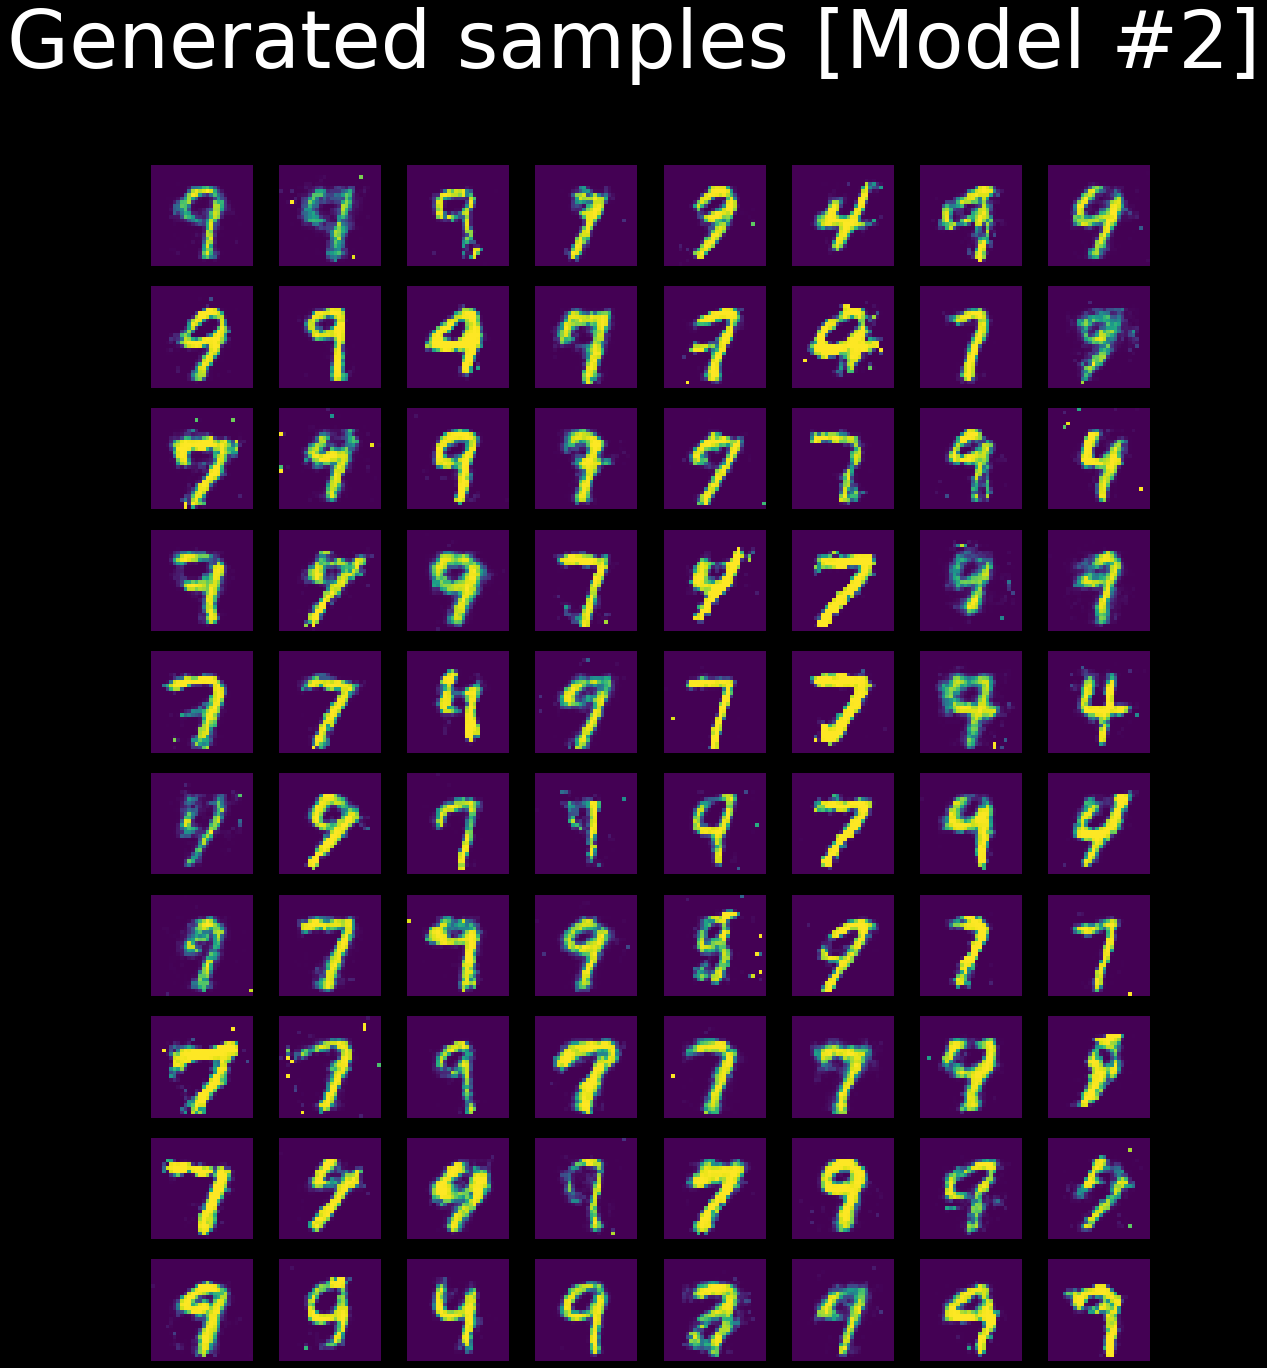

In [11]:
plot_samples('Generated samples [Model #2]', 'GAN_models/gen654.pt', gen)